<a href="https://colab.research.google.com/github/aptr288/Computer_Vision/blob/master/Object_Detection_and_Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Note - Some of the colors of pictures show are different from expected
#because cv2.imshow is not working on Colab so I am using Matplotlib as workaround
#because OpenCV has BRG and Matlplotlib has RGB there are some discrepancy in color 
# import the necessary packages
import imutils
import cv2
from matplotlib import pyplot as plt
 


# Converting an image to grayscale
We’re going to be thresholding and detecting edges in the image shortly. Therefore we convert the image to grayscale on Line 19 by calling cv2.cvtColor  and providing the image  and cv2.COLOR_BGR2GRAY  flag.

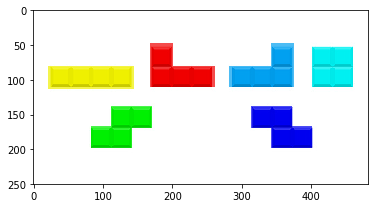

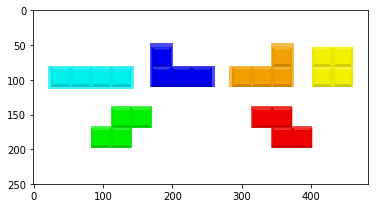

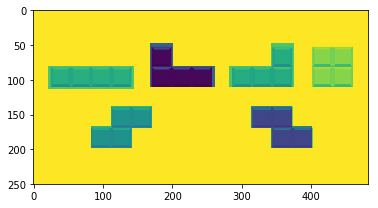

In [15]:

# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread("tetris_blocks.png")

plt.imshow(image)
plt.show()
# convert the image to grayscale
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()
#Convert the image to RGB
gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
# RGB2_img = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray)
plt.show()

# Edge detection
Edge detection is useful for finding boundaries of objects in an image — it is effective for segmentation purposes.
Using the popular Canny algorithm (developed by John F. Canny in 1986), we can find the edges in the image.

We provide three parameters to the cv2.Canny  function:

* img : The gray  image.
* minVal : A minimum threshold, in our case 30 .
* maxVal : The maximum threshold which is 150  in our example.
* aperture_size : The Sobel kernel size. By default this value is 3  and hence is not shown 

Different values for the minimum and maximum thresholds will return different edge maps.

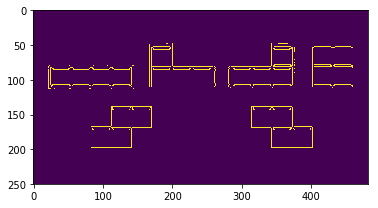

In [16]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 20, 150)
plt.imshow(edged)
plt.show()

# Thresholding
Image thresholding is an important intermediary step for image processing pipelines. Thresholding can help us to remove lighter or darker regions and contours of images.

I highly encourage you to experiment with thresholding. I tuned the following code to work for our example by trial and error (as well as experience):

* Grabbing all pixels in the gray  image greater than 225 and setting them to 0 (black) which corresponds to the background of the image
* Setting pixel vales less than 225 to 255 (white) which corresponds to the foreground of the image (i.e., the Tetris blocks themselves).

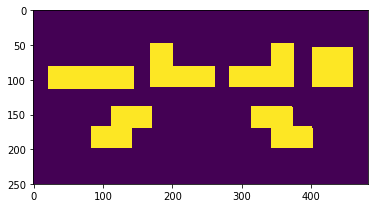

In [11]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)
plt.show()

# Detecting and drawing contours
Initially we use cv2.findContours  to detect the contours in the image. Take note of the parameter flags but for now let’s keep things simple — our algorithm is finding all foreground (white) pixels in the thresh.copy()  image.

Then its very important accounting for the fact that cv2.findContours  implementation changed between OpenCV 2.4, OpenCV 3, and OpenCV 4. This compatibility line is present on the blog wherever contours are involved.

We make a copy of the original image so that we can draw contours on subsequent Lines .

 we draw each c  from the cnts  list on the image using the appropriately named cv2.drawContours . I chose purple which is represented by the tuple (240, 0, 159)

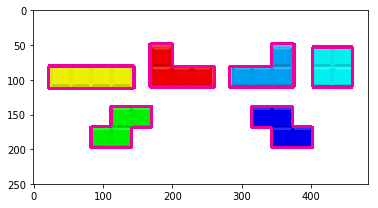

In [12]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
 
# loop over the contours
for c in cnts:
	# draw each contour on the output image with a 3px thick purple
	# outline, then display the output contours one at a time
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	plt.imshow(output)
plt.show()

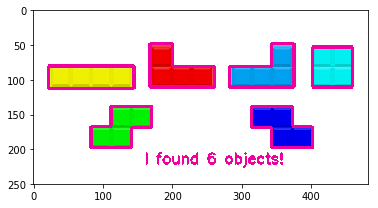

In [13]:
# draw the total number of contours found in purple
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (160, 220),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
plt.imshow(output)
plt.show()

# Erosions and dilations
Erosions and dilations are typically used to reduce noise in binary images (a side effect of thresholding).

To reduce the size of foreground objects we can erode away pixels given a number of iterations:

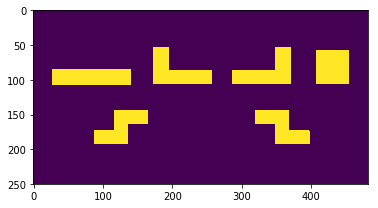

In [18]:
# we apply erosions to reduce the size of foreground objects
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
#utilizing cv2.erode , we proceed to reduce the contour sizes with 5 iterations
plt.imshow(mask)
plt.show()

Similarly, we can foreground regions in the mask. To enlarge the regions, simply use cv2.dilate

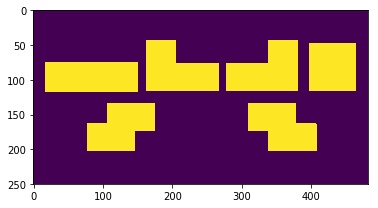

In [19]:
# similarly, dilations can increase the size of the ground objects
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
plt.imshow(mask)
plt.show()

# Masking and bitwise operations
Masks allow us to “mask out” regions of an image we are uninterested in. We call them “masks” because they will hide regions of images we do not care about.
The background is black now and our foreground consists of colored pixels — any pixels masked by our mask  image

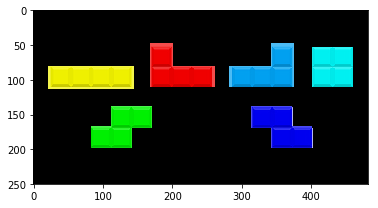

In [20]:
# a typical operation we may want to apply is to take our mask and
# apply a bitwise AND to our input image, keeping only the masked
# regions
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)
plt.show()

The mask  is generated by copying the binary thresh  image.

From there we bitwise AND the pixels from both images together using cv2.bitwise_and